# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

- We need to dummify the following categorical variables: 'species', 'island', 'sex'

In [ ]:
# Code Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

Text(0.5, 1.0, 'Polynomial Regression Models for Bill Depth Prediction')

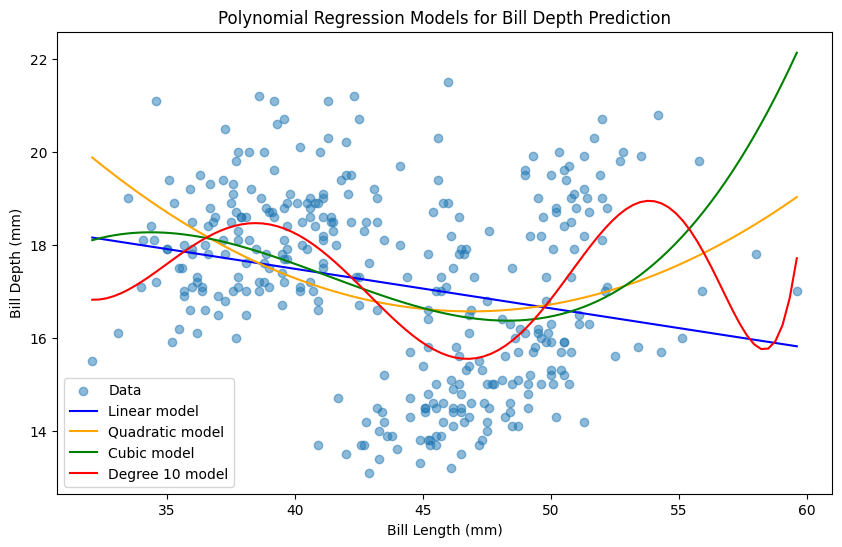

In [ ]:
# Code Here
penguins = load_penguins().dropna(subset=['bill_length_mm', 'bill_depth_mm'])
X = penguins[['bill_length_mm']].values
y = penguins['bill_depth_mm'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X)
quadratic_model = LinearRegression()
quadratic_model.fit(X_poly_2, y)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X)
cubic_model = LinearRegression()
cubic_model.fit(X_poly_3, y)

poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X)
degree_10_model = LinearRegression()
degree_10_model.fit(X_poly_10, y)

x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

y_linear_plot = linear_model.predict(x_plot)
y_quadratic_plot = quadratic_model.predict(poly_features_2.transform(x_plot))
y_cubic_plot = cubic_model.predict(poly_features_3.transform(x_plot))
y_degree_10_plot = degree_10_model.predict(poly_features_10.transform(x_plot))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Data")

plt.plot(x_plot, y_linear_plot, label="Linear model", color="blue")
plt.plot(x_plot, y_quadratic_plot, label="Quadratic model", color="orange")
plt.plot(x_plot, y_cubic_plot, label="Cubic model", color="green")
plt.plot(x_plot, y_degree_10_plot, label="Degree 10 model", color="red")

plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.title("Polynomial Regression Models for Bill Depth Prediction")


* Are any of the models above underfitting the data? If so, which ones and how can you tell?

The linear model underfits the data because it doesn't show the general trend up the data moving back up. A case could also be made that the quadratic model underfits the data because it is generalizing too much.

* Are any of the models above overfitting the data? If so, which ones and how can you tell?

The degree 10 model is overfitting because it is trying to capture all of the nuances of the this sample. A case could also be made that the cubic model is overfitting for the same reason, but not as extreme.

* Which of the above models do you think fits the data best and why?

I like the cubic model the best. It fits the data well and describes some but not all nuances in the sample data, without being too generalizing and underfitting. The other in contention is the quadratic model, but the cubic model describes fits the pattern of the scatter just a little better without overfitting.